Tiempo de ejecución de versión iterativa:  0.0413973331451416


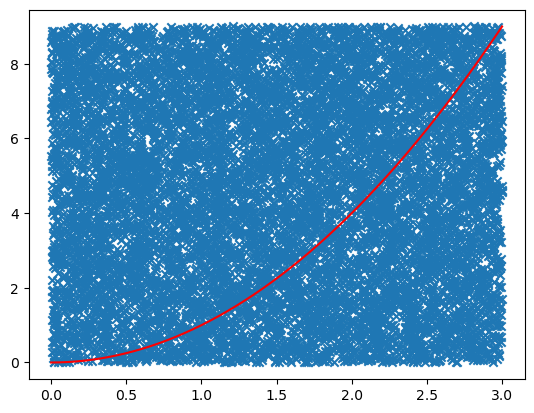

Valor de nuestra función: 
8.988299999999999
Tiempo de ejecución de versión vectorial:  0.01994633674621582


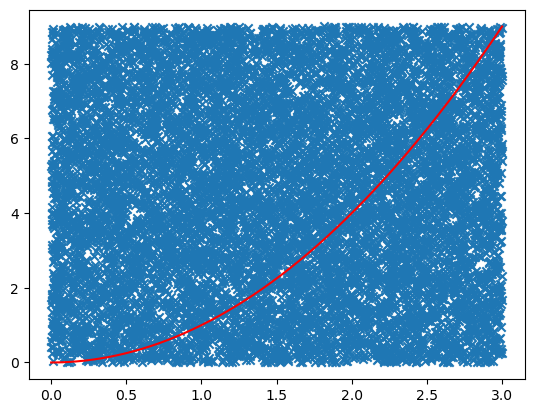

Valor de nuestra función: 
9.0531


In [16]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt # para dibujar la gráfica
import time as time

a = 0
b = 3
numPuntos = 1000

# funcion que vamos a integrar
def cuadrado(x):
    return x * x

#puntos = np.random.random((2, numPuntos)) # matriz de 2xnumPuntos; a efectos prácticos es una lista bidimentsional (x,y)
spacedX = np.linspace(a, b, numPuntos) #Genera un array de 1000 puntos entre 0 y 3; se usará para la función y para la generación de puntos Monte Carlo
listaX = []
listaY = []
debajo= []
funVals = [cuadrado(x) for x in spacedX] #Calculamos todos los valores de la función f(x)

# calcula la integral de fun entre valores a y b
def integra_mc_iter(fun, _a, _b, _numPuntos):
    M = max(funVals) #Calcula el valor maximo
    count_inside = 0

    for i in range(_numPuntos):
        x = np.random.uniform(_a, _b)
        y = np.random.uniform(0, M)
        listaX.append(x)  # Para su representación gráfica
        listaY.append(y)
        
        # Comprobamos si el punto en x tiene su valor bajo y
        if y <= fun(x):
            count_inside += 1
    
    # Calculamos el valor del área del rectángulo ((b-a) * M) y hacemos la relacion de los puntos en la función
    return (count_inside/_numPuntos) * (_b-_a) * M

def integra_mc_vect(fun, _a, _b, _numPuntos):
    
    M = max(funVals)
    x = np.random.uniform(_a, _b, _numPuntos)
    y = np.random.uniform(0, M, _numPuntos)
    debajo = y[y <= fun(x)]
    plt.scatter(x,y, marker = "x")

    #Len devuelve el numero de puntos que hemos ido cargando SOLO si estan por debajo de la funcion
    return (len(debajo) / numPuntos) * (_b - _a) * M




# funcion que genera los puntos y representa por pantalla
startIter = time.time()
valor = integra_mc_iter(cuadrado,a,b,numPuntos)
endIter = time.time()
print("Tiempo de ejecución de versión iterativa: ",(endIter - startIter))
plt.scatter(listaX, listaY, marker="x")
plt.plot(spacedX, funVals, color = "red")
plt.show()
print('Valor de nuestra función: ') 
print(valor)

startVect =time.time()
valor2 = integra_mc_vect(cuadrado,a,b,numPuntos)
endVect = time.time()
print("Tiempo de ejecución de versión vectorial: ",(endVect - startVect))
plt.plot(spacedX, funVals, color = "red")
plt.show()
print('Valor de nuestra función: ') 
print(valor2)
